<h1 style="color:#032652 ; font-family:'Times New Roman' ">Customer Churn Prediction and Analysis for Krisp: EDA </h1>

<h2 style="background:#F6FAFF; color:#053573 ; font-family:'Times New Roman' "> <br>  General Overview and Purpose <br> </h2>

<p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify "> <br>  The aim of this study is to provide a comprehensive analysis of the Krisp's Customer Churn Dataset and to develop a predictive model for customer churn rate. The project is comprised of three distinct notebooks, each with a specific focus. The current initial notebook concentrates on conducting a thorough statistical exploration of the dataset, while subsequent notebooks will showcase the development and utilization of a diverse machine learning and neural network algorithms, alongside hyperparameter optimization.
<br>
<br>
Krisp operates as both a B2C and B2B entity; however, the forthcoming study will solely examine the B2C aspect. The company offers two pricing plans: the freemium plan, which includes features of the pro plan but with certain limitations, and the pro plan, which offers full functionality. Given that revenue generation is vital for businesses, our focus will be on paying consumers. As such, we will exclusively analyze the behavior and churn patterns of those utilizing the pro plan.
<br>
<br>
In order to ensure the reliability and accuracy of the dataset, it was carefully curated by selecting information from multiple tables, conducting calculations, aggregations, and testing through a lengthy and detailed SQL query. However, it is important to note that the dataset used in this study does not represent the entirety of Krisp's customer base. To prevent the inclusion of potentially incorrect or anomalous data patterns, the dataset was primarily sourced from the most reliable data sources while excluding mixed and strange payment data. This approach was taken to ensure the validity and robustness of the dataset, and to ensure that the results of the analysis are meaningful and actionable for businesses seeking to reduce customer churn rates.
<br>
<br>
</p> 



<h2 style="background:#F6FAFF; color:#053573 ; font-family:'Times New Roman'"> <br> Data Cleaning and Exploratory Data Analysis <br></h2>

> <p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify "> Loading libraries and data </p>

In [1]:
#Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from tabulate import tabulate


from scipy.stats import skew, kurtosis, zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the data into a dataframe 

churn_data = pd.read_csv("data.csv")
churn_data.head()

,customer id,domain category,channel grouping,desktop category,overall calls(mins),overall nc(mins),avg daily calls(mins),average daily nc(mins),average monthly nc(mins),average monthly calls(mins),tenure,churn,plan interval,payment method,country tier
0,1215579,Generic Domain,(Other),Win,210729.20,196757.70,379.68,373.35,7027.05,7526.03,12.0,No,year,stripe,Tier 2
1,3309129,Generic Domain,Referral,Win,60040.22,49593.68,228.28,193.72,3542.40,4288.58,13.7,No,year,paypal,Tier 1
2,2156734,Generic Domain,Social,Win,238463.23,226809.67,421.30,409.40,10309.52,10839.23,24.0,No,year,stripe,Tier 1
3,63628,Work Domain,(Other),Win,21504.88,20165.22,72.15,82.30,1120.28,896.03,24.3,No,year,stripe,Tier 1
4,71759,Generic Domain,(Other),Both,72741.47,46416.12,115.27,85.78,1856.63,2909.65,24.0,No,year,stripe,Tier 2


> <p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify "> Understanding Variables and Cleaning the Data </p>

In [4]:
# Checking the existence of duplicates in the customer ID column

print(f"The count of unique customer IDs: {churn_data['customer id'].nunique()} ")

print(f"The count of all customer IDs:  {churn_data['customer id'].count()}")

if churn_data['customer id'].count() == len(churn_data.index):
        print('Customer ID count equals number of rows')

The count of unique customer IDs: 73394 
The count of all customer IDs:  73394
Customer ID count equals number of rows


<p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 17px ; font-weight: 550  "> <br>  The customer ID is a unique identifier, hence each row represents information for one customer. I will start off by dropping the customer ID column as it is a string identification, thus not useful for prediction.
<br>
<br>
</p> 

In [5]:
churn_data = churn_data.drop(
    ['customer id'], axis = 1)
churn_data.head()

,domain category,channel grouping,desktop category,overall calls(mins),overall nc(mins),avg daily calls(mins),average daily nc(mins),average monthly nc(mins),average monthly calls(mins),tenure,churn,plan interval,payment method,country tier
0,Generic Domain,(Other),Win,210729.20,196757.70,379.68,373.35,7027.05,7526.03,12.0,No,year,stripe,Tier 2
1,Generic Domain,Referral,Win,60040.22,49593.68,228.28,193.72,3542.40,4288.58,13.7,No,year,paypal,Tier 1
2,Generic Domain,Social,Win,238463.23,226809.67,421.30,409.40,10309.52,10839.23,24.0,No,year,stripe,Tier 1
3,Work Domain,(Other),Win,21504.88,20165.22,72.15,82.30,1120.28,896.03,24.3,No,year,stripe,Tier 1
4,Generic Domain,(Other),Both,72741.47,46416.12,115.27,85.78,1856.63,2909.65,24.0,No,year,stripe,Tier 2


In [6]:
def general_info(df):
    """
    A general overview about the dataset's shape and structure.
    
    """
    
    number_of_rows, number_of_columns = df.shape
    data_shape = pd.DataFrame({
        "The Number of Rows": [number_of_rows],
        "The Number of Columns": [number_of_columns]})
    
    print(tabulate(data_shape, headers=data_shape.columns, tablefmt="grid",stralign='center', showindex=False))

    
    summary = pd.DataFrame({
        "Number of Numerical Columns": [len(df.select_dtypes(include=np.number).columns)],
        "Number of Categorical Columns": [len(df.select_dtypes(exclude=np.number).columns)],
        "Number of Columns with Null Values": [len(df.columns[df.isnull().any()].tolist())] })
    
    print(tabulate(summary, headers=summary.columns,tablefmt="pretty", stralign='center', showindex=False))
    
    print(f"\n\033[1m\033[6mThe Column(s) with Null Values :  {df.columns[df.isnull().any()].tolist()}\n\033[0m")
    

    return " "


In [7]:
print(general_info(churn_data))

+----------------------+-------------------------+
|   The Number of Rows |   The Number of Columns |
+======================+=========================+
|                73394 |                      14 |
+----------------------+-------------------------+
+-----------------------------+-------------------------------+------------------------------------+
| Number of Numerical Columns | Number of Categorical Columns | Number of Columns with Null Values |
+-----------------------------+-------------------------------+------------------------------------+
|              7              |               7               |                 0                  |
+-----------------------------+-------------------------------+------------------------------------+

The Column(s) with Null Values :  []

 


<p style="color:#0A0134 ; font-family:'Times New Roman'; font-size: 17px "> The dataset has no columns containing null values. And has an equal number of categorical and numerical columns. These columns represent both behavioral and demographic characteristics of customers, providing a comprehensive perspective on the factors that may influence customer churn rates. 
</p> 

In [8]:
#Extracting unique values of categorical columns  beside the country columnn

cat_columns = ['desktop category', 'churn', 'plan interval', 'payment method', 'channel grouping ', 'domain category', 'country tier']

# Create a list of lists to store the table data
values = []

# Add table headers
values.append(['Column', 'Unique values'])

# Add unique values for each categorical column
for col in cat_columns:
    unique_values = churn_data[col].unique()
    values.append([col, ', '.join(unique_values)])

# Print the table
print(tabulate(values, headers='firstrow', tablefmt='fancy_grid'))

╒══════════════════╤════════════════════════════════════════════════════════════════════════════════╕
│ Column           │ Unique values                                                                  │
╞══════════════════╪════════════════════════════════════════════════════════════════════════════════╡
│ desktop category │ Win, Both, Mac, No Desktop                                                     │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ churn            │ No, Yes                                                                        │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ plan interval    │ year, month, both                                                              │
├──────────────────┼────────────────────────────────────────────────────────────────────────────────┤
│ payment method   │ stripe, paypal                                               

<p style=" color:#0A0134 ; font-family:'Times New Roman'; font-size: 17px "> 
 The dataset highlights two primary payment options utilized by Krisp's users: Stripe and PayPal. Further, it includes the subscription intervals utilized by customers, including annual and monthly options. Notably, customers who transition between these subscription intervals during the renewal process are considered as having purchased both.<br>
<br>Given that Krisp is a downloadable application, the dataset includes a 'desktop category' field, which provides insight into whether a user utilized Krisp on a Mac or Windows device, or both. Additionally, the dataset includes a 'domain category' field, which specifies the type of email domain utilized by users, with 'temp' indicating that a temporarily provided domain was used.<br>
<br>
The country tierings are done based on countries' economy and spending habits, as well as other considerations.<br>
<br>Finally, the 'channel grouping' field captures the Last Touch Attribution channel immediately prior to user registration, providing valuable information regarding the marketing channels that are most effective in driving user acquisition. 
</p> 

In [9]:
#Generates some statistical data about the numerical columns 
churn_data.select_dtypes(include=[np.number]).describe().round(2)

,overall calls(mins),overall nc(mins),avg daily calls(mins),average daily nc(mins),average monthly nc(mins),average monthly calls(mins),tenure
count,73394.00,73394.00,73394.00,73394.00,73394.00,73394.00,73394.00
mean,37140.85,32746.58,180.67,168.11,2309.63,2565.44,16.21
std,52158.04,47940.70,123.01,117.47,2575.64,2729.05,11.49
min,0.50,0.05,0.50,0.05,0.05,0.50,0.40
25%,6835.83,5480.67,102.33,93.92,790.34,930.77,8.40
50%,20174.72,16910.12,153.07,142.47,1627.15,1843.51,12.20
75%,47749.47,41715.68,227.28,211.98,2968.64,3294.14,24.00
max,4114772.93,4084597.83,8466.60,8421.85,214978.83,216566.98,55.10


<p style=" color:#0A0134 ; font-family:'Times New Roman'; font-size: 18px "> <br> 
    The numerical columns in the dataset exhibit a common trend, where the mean values are higher than their respective medians, indicating that the data is skewed towards higher values. Additionally, the presence of outliers is apparent, as the maximum values are significantly greater than both the mean and median values.<br>
<br> To gain a deeper understanding of the dataset's distribution and characteristics, further analysis of its skewness and the presence of outliers would be beneficial.<br>
    
<br>
</p> 

In [10]:
def describe_numeric(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    results = []
    for col in numeric_cols:
        skew_val = skew(df[col])
        outliers = df[(df[col] < (df[col].quantile(0.25) - 1.5 *(df[col].quantile(0.75) - df[col].quantile(0.25)))) | (df[col] >  (df[col].quantile(0.75) + 1.5 *(df[col].quantile(0.75) - df[col].quantile(0.25))))]
        outlier_count = len(outliers)
        outlier_percent = outlier_count / len(df) * 100
        results.append([col, skew_val, outlier_count, outlier_percent])
    headers = ['Column Name', 'Skewness',  'Outliers', 'Outlier %']
    print(tabulate(results, headers=headers, floatfmt=".2f"))

In [11]:
describe_numeric(churn_data)

Column Name                    Skewness    Outliers    Outlier %
---------------------------  ----------  ----------  -----------
overall calls(mins)                9.88        5258         7.16
overall nc(mins)                  11.62        5543         7.55
avg daily calls(mins)              7.45        3142         4.28
average daily nc(mins)             8.20        3152         4.29
average monthly nc(mins)          11.85        4395         5.99
average monthly calls(mins)       10.40        4381         5.97
tenure                             0.69        1320         1.80


<p style=" color:#0A0134 ; font-family:'Times New Roman'; font-size: 18px "> <br> The skewness coefficient for the tenure column falls within the range of 0.5 and 1, indicating that the values are slightly positively skewed. Conversely, the skewness coefficient for other columns is considerably higher than 1, indicating that they are extremely skewed. Additionally, we can observe that the percentage of outliers is around 4-6% for all columns except for tenure. This could be because the other columns represent usage characteristics that are dependent on the customer's tenure. For longer-tenured customers, these characteristics tend to be higher. Additionally, customers may vary in their engagement with the product, which could contribute to the presence of outliers. <br>
 <br>
Since the algorithms we are going to use will not be affected by outliers,also the outliers are because of natural behavior we can leave them. The only outlier-sensitive model which will be included in the model ensemble is logistic regression. To ensure that the dataset is of high quality and suitable for use across multiple algorithms, it may be beneficial to treat outliers using appropriate methods and save a separate dataset for logistic regression analysis.e going to use Quantile based flooring and capping approach. In this way the data points that are lesser than the 10th percentile are replaced with the 10th percentile value and the data points that are greater than the 90th percentile are replaced with 90th percentile 
<br>
</p> 

In [12]:
churn_data_lr = churn_data.copy()
for column in churn_data.select_dtypes(include=[np.number]).columns:
    lower_bound = np.percentile(churn_data[column], 10)
    upper_bound = np.percentile(churn_data[column], 90)
    churn_data_lr[column] = np.where(churn_data[column] < lower_bound, lower_bound, churn_data[column])
    churn_data_lr[column] = np.where(churn_data[column] > upper_bound, upper_bound, churn_data[column])

In [13]:
churn_data_lr.head()

,domain category,channel grouping,desktop category,overall calls(mins),overall nc(mins),avg daily calls(mins),average daily nc(mins),average monthly nc(mins),average monthly calls(mins),tenure,churn,plan interval,payment method,country tier
0,Generic Domain,(Other),Win,91634.66,82561.317,322.90,301.23,4947.376,5449.685,12.0,No,year,stripe,Tier 2
1,Generic Domain,Referral,Win,60040.22,49593.680,228.28,193.72,3542.400,4288.580,13.7,No,year,paypal,Tier 1
2,Generic Domain,Social,Win,91634.66,82561.317,322.90,301.23,4947.376,5449.685,24.0,No,year,stripe,Tier 1
3,Work Domain,(Other),Win,21504.88,20165.220,72.15,82.30,1120.280,896.030,24.3,No,year,stripe,Tier 1
4,Generic Domain,(Other),Both,72741.47,46416.120,115.27,85.78,1856.630,2909.650,24.0,No,year,stripe,Tier 2


In [14]:
describe_numeric(churn_data_lr)

Column Name                    Skewness    Outliers    Outlier %
---------------------------  ----------  ----------  -----------
overall calls(mins)                0.93           0         0.00
overall nc(mins)                   0.97           0         0.00
avg daily calls(mins)              0.43           0         0.00
average daily nc(mins)             0.42           0         0.00
average monthly nc(mins)           0.69           0         0.00
average monthly calls(mins)        0.68           0         0.00
tenure                             0.51           0         0.00


> <p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">  Analysing the distribution of variables: </p>


In [15]:
# define the tenure frequency intervals
tenure_bins = [0, 11, 23, 35, 47, 60]
labels = ['Up to 12 months', '1-2 years', '2-3 years','3-4 years', '4+']

data = churn_data.copy()
# create a new column based on the tenure frequency intervals
data['tenure_frequency'] = pd.cut(churn_data['tenure'], bins=tenure_bins, labels =labels)

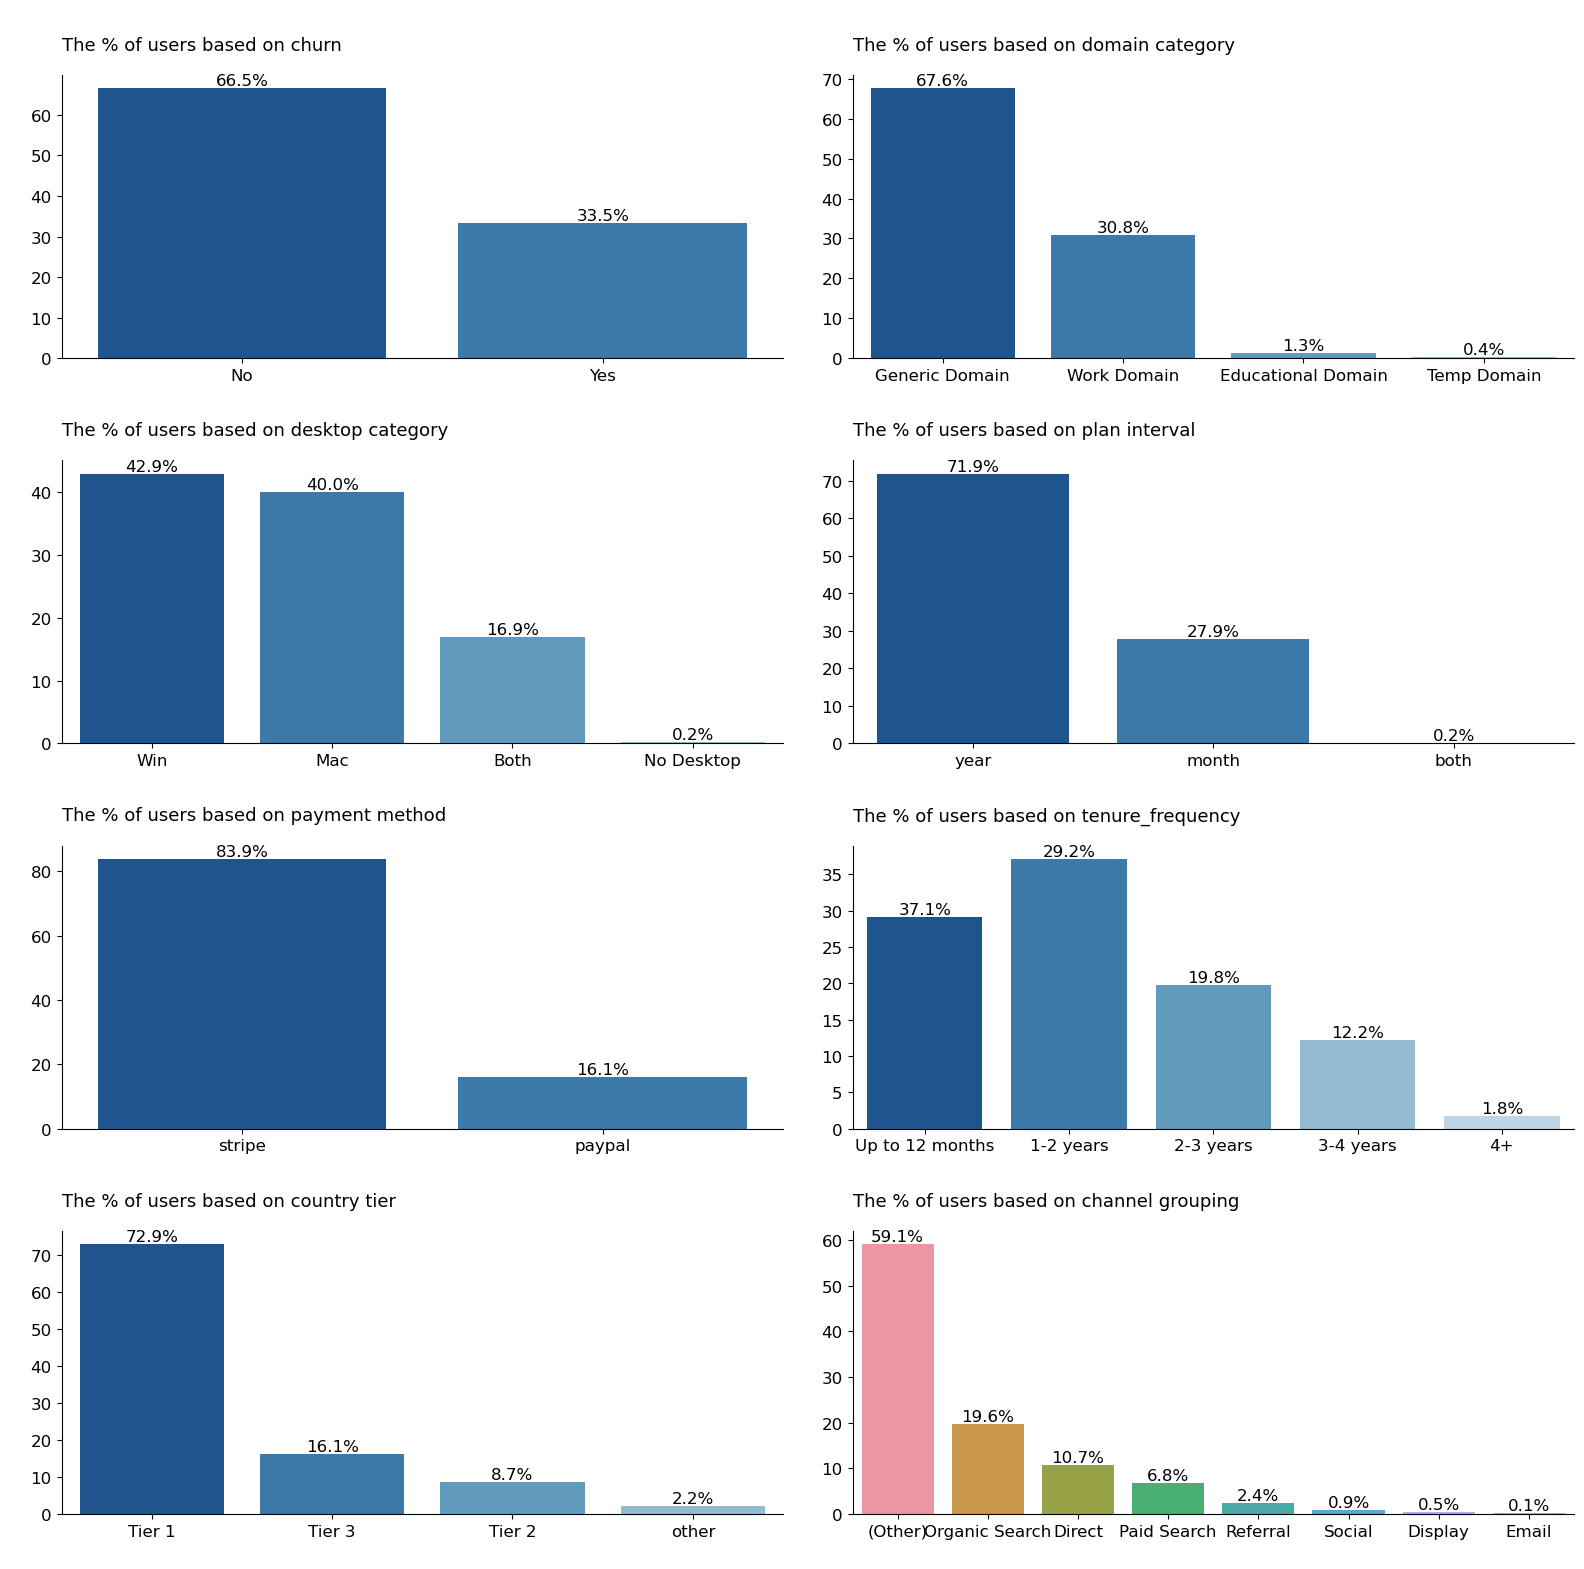

In [16]:

columns = ['churn','domain category', 'desktop category',  'plan interval', 'payment method', "tenure_frequency","country tier", "channel grouping "]

# the number of rows and columns needed to plot the subplots
num_rows = 4
num_cols = 2

# Set up the plot

plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlepad'] = 18 

# Create a grid of subplots based on the number of categorical columns in the dataset
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Set the overall title of the plot
fig.suptitle(' ', fontsize=16)

# Set the color palette for the bar charts
sns.set_palette('Blues_r')

# Create a bar chart for each categorical column and add it to a separate subplot
for i, col in enumerate(columns):
    row_idx = i // num_cols
    col_idx = i % num_cols
    counts = data[col].value_counts()
    percentages = counts / counts.sum() * 100
    ax = sns.barplot(x=percentages.index, y=percentages.values, ax=axes[row_idx, col_idx])
    ax.set_xlabel(' ', rotation=40, ha='right')
    ax.set_ylabel(' ')
    ax.set_title("The % of users based on {}".format(col), fontsize=13, loc='left')
    ax.spines[['top', 'right']].set_visible(False)
    
    # Add percentages on top of the bars
    for j, patch in enumerate(ax.patches):
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_height(),
                f'{percentages[j]:.1f}%',
                fontsize=12, ha='center', va='bottom')

# Adjust the layout of the subplots
plt.tight_layout()
# Show the plot
plt.show()


<ul>
  <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">Our dataset indicates that the vast majority of customers, 66.5%, do not churn, as we would expect. Among the customers who do churn, we can observe that the distribution of payment method type shows a preference for stripe over paypal. Additionally, when it comes to contract type, most customers seem to prefer yearly subscriptions instead of monthly ones. </p> </li>
   <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">There is not a significant difference in the distribution percentages between users of Mac and Windows operating systems. The dataset also reveals that generic domains are more popular among customers than work domains. </p>
    </li>
   <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">Looking at the tenure of customers, the majority of them have been with the Krisp company for 1-2 years, but a considerable number of users have been with the company for less than a year and churned. It is possible that they are new customers who did not churn at the time the data was extracted but might churn later. On the other hand, few users have been with the company for more than four years since the app was launched in 2019.  </p> </li>
  <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">The majority of users are from Tier 1 countries, which include US, Canada, UK, etc.  </p> </li>
</ul>

 > <p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">   Analyze the churn rate by categorical variables: </p>



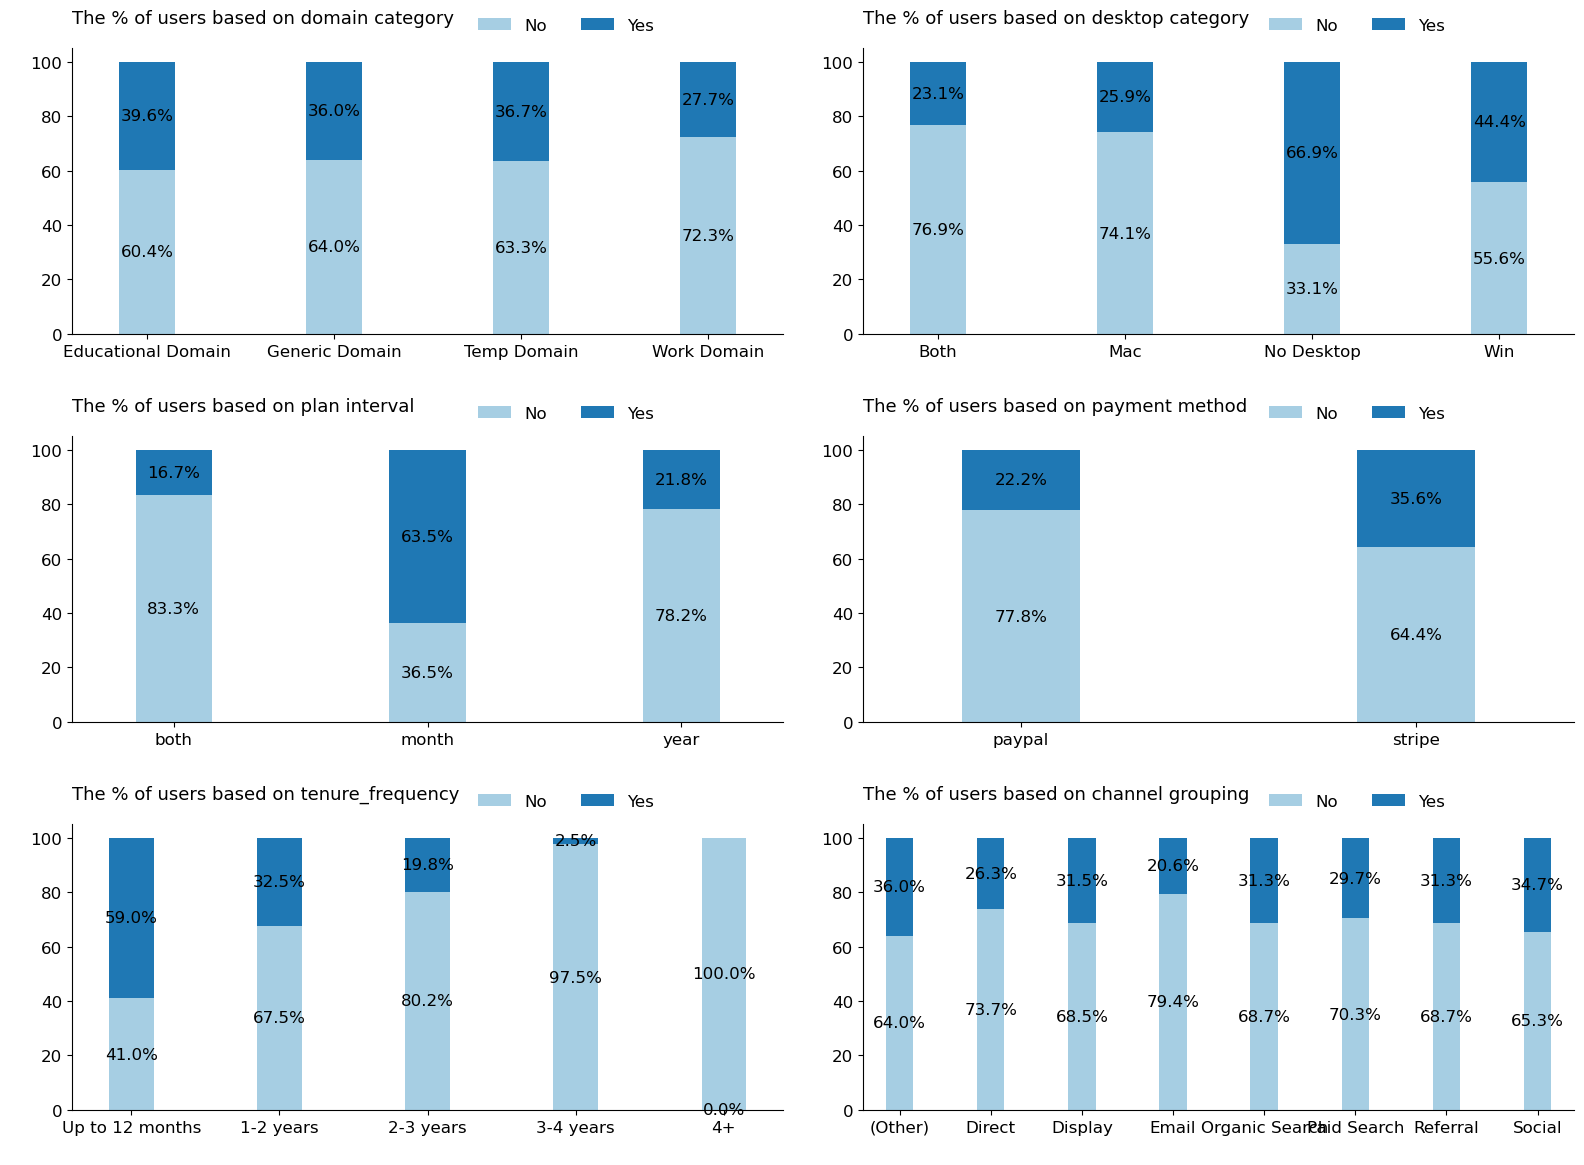

In [17]:
    
cat_cols = ['domain category', 'desktop category',  'plan interval', 'payment method', "tenure_frequency", "channel grouping "]
    
# the number of rows and columns needed to plot the subplots
num_rows = 3
num_cols = 2

# Set up the plot

plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlepad'] = 18 
# Create a grid of subplots based on the number of categorical columns in the dataset
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 4*num_rows))

# Set the overall title of the plot
fig.suptitle('', fontsize=16)

# Set the color palette for the bar charts
sns.set_palette("Paired")

# Create a bar chart for each categorical column and add it to a separate subplot
for i, col in enumerate(cat_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    # Group the data by the churn column and the categorical column
    groups = data.groupby([ col, 'churn']).size().unstack()
    groups.rename(columns={0:'No', 1:'Yes'}, inplace=True)

    ax = (groups.T*100.0 / groups.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0, ax=axes[row_idx, col_idx])
    ax.set_xlabel(' ', rotation=40, ha='right')
    ax.set_ylabel(' ')
    ax.set_title("The % of users based on {}".format(col), fontsize=13, loc='left')
    ax.legend( frameon=False, fontsize = "medium", bbox_to_anchor =(0.55, 1), ncol = 2).set_title(None)
    ax.spines[['top', 'right']].set_visible(False)
    
    # Add percentages on top of the bars
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

# Adjust the layout of the subplots
plt.tight_layout()
# Show the plot
plt.show()

<ul>
  <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">  The users who have opted for monthly subscriptions have exhibited higher churn rates compared to those who have opted for yearly subscriptions. </p> </li>
   <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">The users with less than a year of tenure on our platform have the highest churn rates, and as the tenure of a user increases, the churn rate tends to decrease.    </p>
    </li>
   <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">Additionally, users in the work domain exhibit lower churn rates compared to users in other domains. This finding is logical since our krisp's primary use case is for individuals involved in online meetings.</p> </li>
       <li><p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">  Mac users have lower churn rates compared to Windows users. </p> </li>
</ul>



In [18]:
data = churn_data[[ 'overall calls(mins)', 'overall nc(mins)',
       'avg daily calls(mins)', 'average daily nc(mins)',
       'average monthly nc(mins)', ' average monthly calls(mins)','tenure',
       'churn']]
data['churn'] = data['churn'].map({'No': 0, 'Yes': 1})

<Axes: >

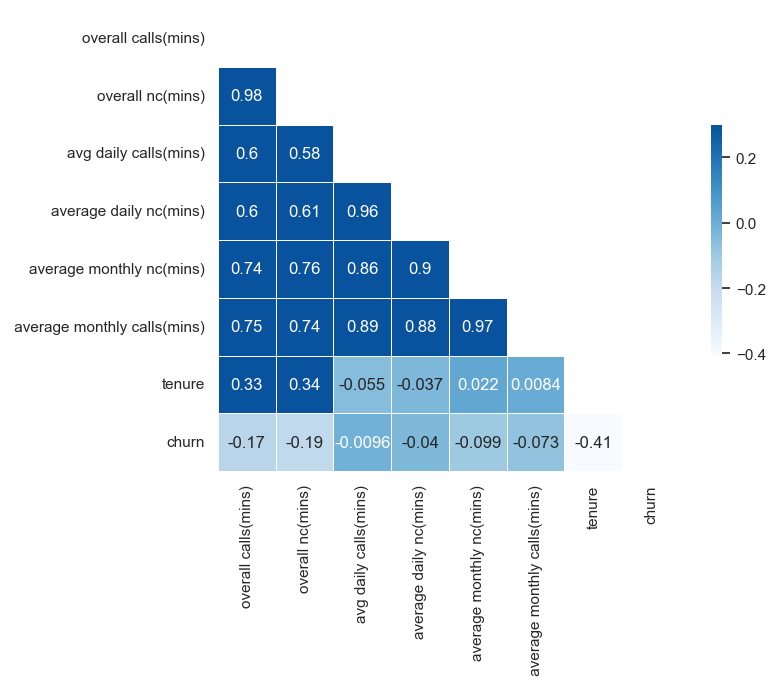

In [19]:
#Set and compute the Correlation Matrix:

sns.set(style="white")
corr = data.corr()

#Generate a mask for the upper triangle:

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(8, 6))

#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr,annot= True, mask=mask, cmap="Blues", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

<p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify "> 
The negative correlation between tenure and churn is a well-established phenomenon. As a customer's tenure (i.e., the length of time they have been using a service) increases, their likelihood of churning (i.e., discontinuing the service) decreases. This relationship can be explained by various factors, such as customer loyalty, satisfaction, and switching costs.<br>
<br>We have multiple features that indicate the user's usage, including call duration and noise cancellation usage. Although call duration and noise cancellation duration may sometimes differ, they are usually similar, especially for paying customers who have access to noise cancellation features. We have calculated overall duration and average daily and monthly statistics for both noise cancellation and calls. However, because these features are highly correlated, it may be appropriate to drop some of them to avoid issues of multicollinearity.<br>
<br>To examine multicollinearity, we can use Variable Inflation Factors (VIF). Unlike a correlation matrix, VIF measures the strength of the correlation between a variable and a group of other independent variables in a dataset. VIF values range from 1 to infinity, with values exceeding 10 indicating high multicollinearity between the independent variables. Therefore, we can use VIF to identify highly correlated variables and consider dropping some of them to improve our analysis. </p>

In [20]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) 
    for i in range(X.shape[1])]
    return(vif)
dataset2 =  churn_data[[ 'overall calls(mins)', 'overall nc(mins)',
       'avg daily calls(mins)', 'average daily nc(mins)',
       'average monthly nc(mins)', ' average monthly calls(mins)','tenure']]
calc_vif(dataset2)

,variables,VIF
0,overall calls(mins),75.176204
1,overall nc(mins),76.018499
2,avg daily calls(mins),96.439290
3,average daily nc(mins),95.452330
4,average monthly nc(mins),121.688130
5,average monthly calls(mins),124.180703
6,tenure,2.424484


<p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify "> 
  Upon examining the VIF values for the usage metrics, we can observe that they all have high VIF values and appear to be highly collinear with each other. To address this issue, we may need to drop some of the features to improve our analysis.<br>
  <br>After experimenting with dropping different features, we found that retaining only the overall noise cancellation usage and average monthly noise cancellation metrics reduced the VIF values for all independent variables to a significant extent. This approach may improve our analysis by reducing the impact of multicollinearity on our results.
    </p>

In [21]:
dataset2 = churn_data[[ 'overall nc(mins)',
       'average monthly nc(mins)', 'tenure']]
calc_vif(dataset2)

,variables,VIF
0,overall nc(mins),3.958186
1,average monthly nc(mins),3.505152
2,tenure,1.638012


In [22]:
#dropping the unnecessary fields
churn_data.drop([ 'overall calls(mins)', 'avg daily calls(mins)', 'average daily nc(mins)',
       ' average monthly calls(mins)'], axis = 1, inplace = True)
churn_data_lr.drop([ 'overall calls(mins)', 'avg daily calls(mins)', 'average daily nc(mins)',
       ' average monthly calls(mins)'], axis = 1, inplace = True)

In [23]:
churn_data.head()

,domain category,channel grouping,desktop category,overall nc(mins),average monthly nc(mins),tenure,churn,plan interval,payment method,country tier
0,Generic Domain,(Other),Win,196757.70,7027.05,12.0,No,year,stripe,Tier 2
1,Generic Domain,Referral,Win,49593.68,3542.40,13.7,No,year,paypal,Tier 1
2,Generic Domain,Social,Win,226809.67,10309.52,24.0,No,year,stripe,Tier 1
3,Work Domain,(Other),Win,20165.22,1120.28,24.3,No,year,stripe,Tier 1
4,Generic Domain,(Other),Both,46416.12,1856.63,24.0,No,year,stripe,Tier 2


> <p style=" color:#032652 ; font-family:'Times New Roman'; font-size: 18px ;text-align: justify ">  Saving the datasets </p>

In [24]:
churn_data.to_csv('cleaned_data.csv', index=False)
churn_data_lr.to_csv('cleaned_data_lr.csv', index=False)